In [3]:
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep
from scipy.special import erfc

In [4]:
hep.style.use(hep.style.ROOT)

In [31]:
def ox_diffusion(t, D, z_idx):
    n_order = 10
    u_critical = 0.05
    l = 10 - 2 * z_idx
    x = np.linspace(-l / 2, l / 2, 100)
    u_n = lambda n, D, t: ((-1) ** n) * erfc(
        ((2 * n + 1) * l / 2 - x) / (2 * np.sqrt(D * t))
    ) + ((-1) ** n) * erfc(((2 * n + 1) * l / 2 + x) / (2 * np.sqrt(D * t)))
    depths = np.empty_like(t)
    for i, t_i in enumerate(t):
        u = np.zeros_like(x)
        for n in range(n_order):
            u += u_n(n, D, t_i)
        depths[i] = l / 2 - abs(x[np.argmin(u - u_critical)]) + z_idx
    return depths

In [32]:
time_array = np.linspace(0, 32, 100)
z_index = np.array([1.23, 1.23, 1.24, 1.16, 1.14])
z_index_mean = np.mean(z_index)

/var/folders/4f/rfs4xk8j61x737wyrrknwd980000gn/T/ipykernel_13536/1074346541.py:7: RuntimeWarning: divide by zero encountered in divide
  ((2 * n + 1) * l / 2 - x) / (2 * np.sqrt(D * t))
/var/folders/4f/rfs4xk8j61x737wyrrknwd980000gn/T/ipykernel_13536/1074346541.py:7: RuntimeWarning: invalid value encountered in divide
  ((2 * n + 1) * l / 2 - x) / (2 * np.sqrt(D * t))
/var/folders/4f/rfs4xk8j61x737wyrrknwd980000gn/T/ipykernel_13536/1074346541.py:8: RuntimeWarning: divide by zero encountered in divide
  ) + ((-1) ** n) * erfc(((2 * n + 1) * l / 2 + x) / (2 * np.sqrt(D * t)))
/var/folders/4f/rfs4xk8j61x737wyrrknwd980000gn/T/ipykernel_13536/1074346541.py:8: RuntimeWarning: invalid value encountered in divide
  ) + ((-1) ** n) * erfc(((2 * n + 1) * l / 2 + x) / (2 * np.sqrt(D * t)))


(0.0, 5.0)

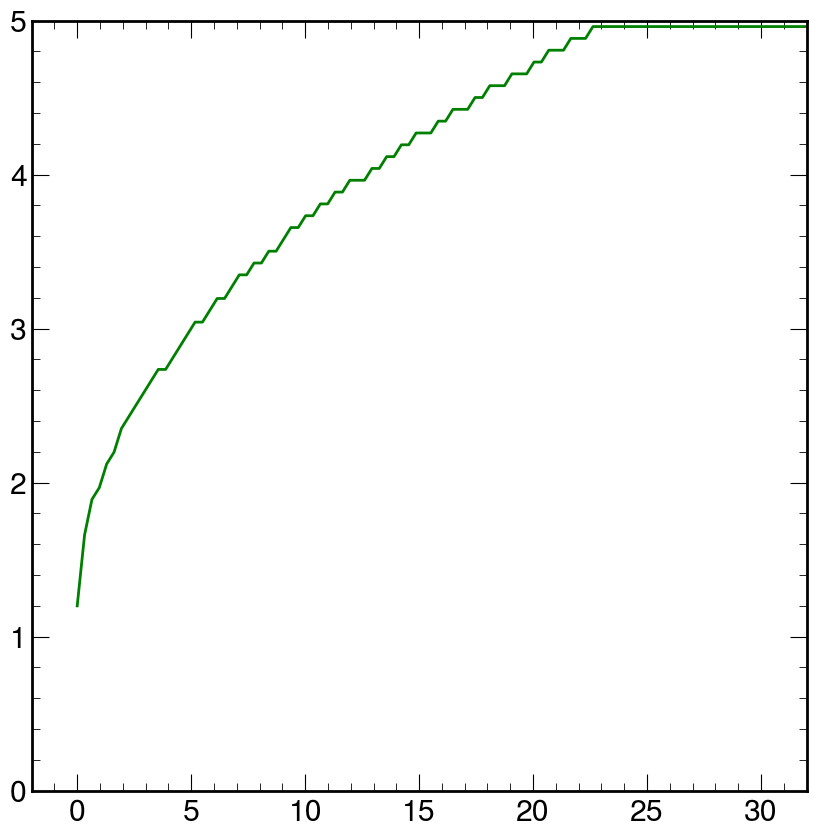

In [34]:
y_2 = ox_diffusion(time_array, D=0.004, z_idx=z_index_mean)
plt.plot(time_array, y_2, label="full equation", color="green", lw=2)
plt.xlim(-2, 32)
plt.ylim(0, 5)